### 多分类的混淆矩阵

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='newton-cg')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9644444444444444

In [12]:
y_predict = log_reg.predict(X_test)

In [13]:
from sklearn.metrics import precision_score
# 多分类无法使用precision_score(y_test, y_predict)
precision_score(y_test, y_predict, average='micro')

0.9644444444444444

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 49,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  2,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 46,  0],
       [ 2,  0,  0,  1,  0,  1,  0,  0,  1, 40]])

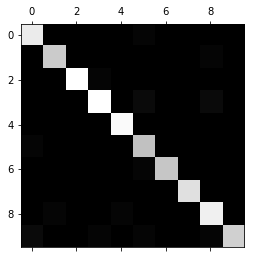

In [15]:
# 数值越大，越亮
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [16]:
row_sum = np.sum(cfm, axis=1)
err_matrix = cfm / row_sum
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05263158, 0.        , 0.        , 0.04166667, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.02173913, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

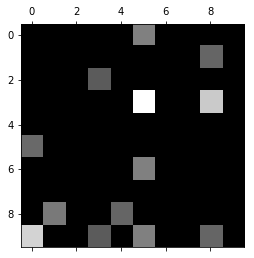

In [17]:
# 中间最亮的意义： 将很多真值为3预测了5
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()